# Additional Data Analysis
In addition to the data analysis used for the figures fo the paper additional investigations and correlation analysis was conducted. This includes:
1. Heatmaps
2. Author Analysis: Subjects
3. Author Analysis: Affiliations
4. Citations vs. Reproducability

## Setup

### Imports


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import numpy as np
import math
import statsmodels.api as sm

### Parameters

In [2]:
data_path = '../data/'
save_figures = False
save_files = False

### Data loading 
Load the following datasets:
- categorical data: `papers_reviewed_reprod_variables_categoric.csv`
- numerical data: `papers_reviewed_reprod_variables_numerical.csv`
- class scores: `score_class.csv`
- dimension scores: `score_dimension.csv`

In [3]:
# Load categoical data
data_categoric = pd.read_csv(f'{data_path}papers_reviewed_reprod_variables_categoric.csv', index_col=0)
data_categoric.head(5)


,DOI,DOI_short,Methodology,Publisher,Year,data_listed,data_metadata,data_stats,data_type,data_access,...,eval_metrics,eval_sig_test,code_link,code_empty,code_preproc,code_features_gen,code_eval,code_params_opt,code_info,code_runable
Paper ID,,,,,,,,,,,,,,,,,,,,,
1,https://doi.org/10.1109/CCDC.2014.6852414,10.1109/CCDC.2014.6852414,MB+ML,IEEE,2014,n,y,n,real-world,No Information,...,"Charts, Error Est.",n,n,na,na,na,na,na,na,na
2,https://doi.org/10.1109/ICTAI.2018.00136,10.1109/ICTAI.2018.00136,ML,IEEE,2018,n,y,n,real-world,proprietary,...,"Precision, Recall",y,n,na,na,na,na,na,na,na
3,https://doi.org/10.1109/ICVR57957.2023.10169760,10.1109/ICVR57957.2023.10169760,MB+ML+KB,IEEE,2023,n,n,n,No Information,No Information,...,Operational KPIs,n,n,na,na,na,na,na,na,na
4,https://doi.org/10.1109/AIKIIE60097.2023.10390401,10.1109/AIKIIE60097.2023.10390401,MB+ML,IEEE,2023,n,n,n,simulation,No Information,...,"Accuracy, F1 score, FPR, TPR",n,n,na,na,na,na,na,na,na
5,https://doi.org/10.1109/ICICT55905.2022.00043,10.1109/ICICT55905.2022.00043,MB+ML+KB,IEEE,2022,n,y,n,"real-world, simulation",No Information,...,"Accuracy, Loss",n,n,na,na,na,na,na,na,na


In [4]:
# Load numerical data
data_numeric = pd.read_csv(f'{data_path}papers_reviewed_reprod_variables_numeric.csv', index_col=0)
data_numeric.head(5)

,DOI,DOI_short,Methodology,Publisher,Year,data_listed,data_metadata,data_stats,data_type,data_access,...,eval_metrics,eval_sig_test,code_link,code_empty,code_preproc,code_features_gen,code_eval,code_params_opt,code_info,code_runable
Paper ID,,,,,,,,,,,,,,,,,,,,,
1,https://doi.org/10.1109/CCDC.2014.6852414,10.1109/CCDC.2014.6852414,MB+ML,IEEE,2014.0,0,1,0,1,0,...,1,0,0,0,0,0,0,0,0,0
2,https://doi.org/10.1109/ICTAI.2018.00136,10.1109/ICTAI.2018.00136,ML,IEEE,2018.0,0,1,0,1,1,...,1,1,0,0,0,0,0,0,0,0
3,https://doi.org/10.1109/ICVR57957.2023.10169760,10.1109/ICVR57957.2023.10169760,MB+ML+KB,IEEE,2023.0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,https://doi.org/10.1109/AIKIIE60097.2023.10390401,10.1109/AIKIIE60097.2023.10390401,MB+ML,IEEE,2023.0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
5,https://doi.org/10.1109/ICICT55905.2022.00043,10.1109/ICICT55905.2022.00043,MB+ML+KB,IEEE,2022.0,0,1,0,1,0,...,1,0,0,0,0,0,0,0,0,0


In [5]:
# Load class scores
scores_class = pd.read_csv(f'{data_path}score_class.csv', index_col=0)
scores_class.head(5)

,Data,Preprocessing,Model,Experiment,Code,Total
Paper ID,,,,,,
1,0.4,0.666667,0.000000,0.666667,0.0,0.346667
2,0.6,0.333333,0.000000,1.000000,0.0,0.386667
3,0.0,0.000000,0.000000,0.333333,0.0,0.066667
4,0.2,0.000000,0.000000,0.333333,0.0,0.106667
5,0.4,0.666667,0.142857,0.666667,0.0,0.375238


In [6]:
# Load dimension scores
scores_dimension = pd.read_csv(f'{data_path}score_dimension.csv', index_col=0)
scores_dimension.head(5)

,D1,D2,D3,degree
Paper ID,,,,
1,0.25,0.2,0.333333,0.294118
2,0.50,0.2,0.333333,0.294118
3,0.00,0.0,0.083333,0.058824
4,0.25,0.0,0.083333,0.117647
5,0.25,0.1,0.333333,0.294118


## Functions for custom graph generation


In [7]:
def gen_boxplot(data, tick_labels, title, ylabel, show_stats=True, ax=None):
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(10, 6))

    box = ax.boxplot(
        data, 
        tick_labels=tick_labels, 
        showmeans=True, 
        meanline=True)

    if show_stats:
        # Add annotations for mean, median, and quartiles
        for i, dataset in enumerate(data):
            mean = np.mean(dataset)
            median = np.median(dataset)
            q1 = np.percentile(dataset, 25)
            q3 = np.percentile(dataset, 75)
            
            text = f"Q3: {q3:.2f}\nMean: {mean:.2f}\nMedian: {median:.2f}\nQ1: {q1:.2f}"

            if len(data) == 2:
                offset_x = 1.1
            else:
                offset_x = 1.2
                
            ax.text(i + offset_x, (q1+q3)/2, text, ha='left', va='center', fontsize=10)

    ax.set_title(title)
    ax.set_ylabel(ylabel)

    if ax is None:
        fig.tight_layout()
        return fig, ax
    else:
        return ax
            

In [8]:
def gen_heatmap(numeric_data, title='Reproducibility Variables', xlabel='Reproducibility Variables', save=None):
    plt.figure(figsize=(10, 10))
    sns.heatmap(numeric_data, annot=False, vmin=0, vmax=1, center=0.5, cmap='vlag_r', yticklabels=numeric_data.index)
    plt.yticks(rotation=0)
    plt.xlabel(title)
    plt.title(xlabel)
    plt.tight_layout()
    if save is not None:
        plt.savefig(save)
    plt.show()

In [9]:
def gen_histogram(subject_df, subject_name, stat_type='subject'):
    if stat_type == 'subject':
        title_string = f'Cited-by-count of authors with {subject_name} in subject area'
    elif stat_type == 'affil':
        title_string = f'Cited-by-count of authors with {subject_name} affiliation'

    # Create subfigures for linear and log scale
    fig, axs = plt.subplots(3, 1, figsize=(12, 6))

    # Calculate the maximum value for scaling
    value_max = max(subject_df.values())
    rounded_max = int(math.ceil(value_max / 1000.0) * 1000)

    axs[0].hist([int(citation) for citation in subject_df.values()], bins=30, color='blue', alpha=0.7)
    axs[0].set_title(f'{title_string}')
    axs[0].set_xlabel('cited-by-count')
    axs[0].set_xlim(0, rounded_max)
    axs[0].set_ylabel('Frequency')

    # up to 1/10 of the maximum value
    limit = int(rounded_max / 10)
    axs[1].hist([int(citation) for citation in subject_df.values() if int(citation) <= limit], bins=30, color='blue', alpha=0.7)
    axs[1].set_title(f'{title_string} (up to {limit} Citations)')
    axs[1].set_xlabel('cited-by-count')
    axs[1].set_xlim(0, limit)
    axs[1].set_ylabel('Frequency')

    # up to 1/100 of the maximum value
    limit = int(rounded_max / 100)
    axs[2].hist([int(citation) for citation in subject_df.values() if int(citation) <= limit], bins=30, color='blue', alpha=0.7)
    axs[2].set_title(f'{title_string} (up to {limit} Citations)')
    axs[2].set_xlabel('cited-by-count')
    axs[2].set_xlim(0, limit)
    axs[2].set_ylabel('Frequency')

    plt.tight_layout()
    plt.show()


## 1. Heatmaps

### Reproducability variables

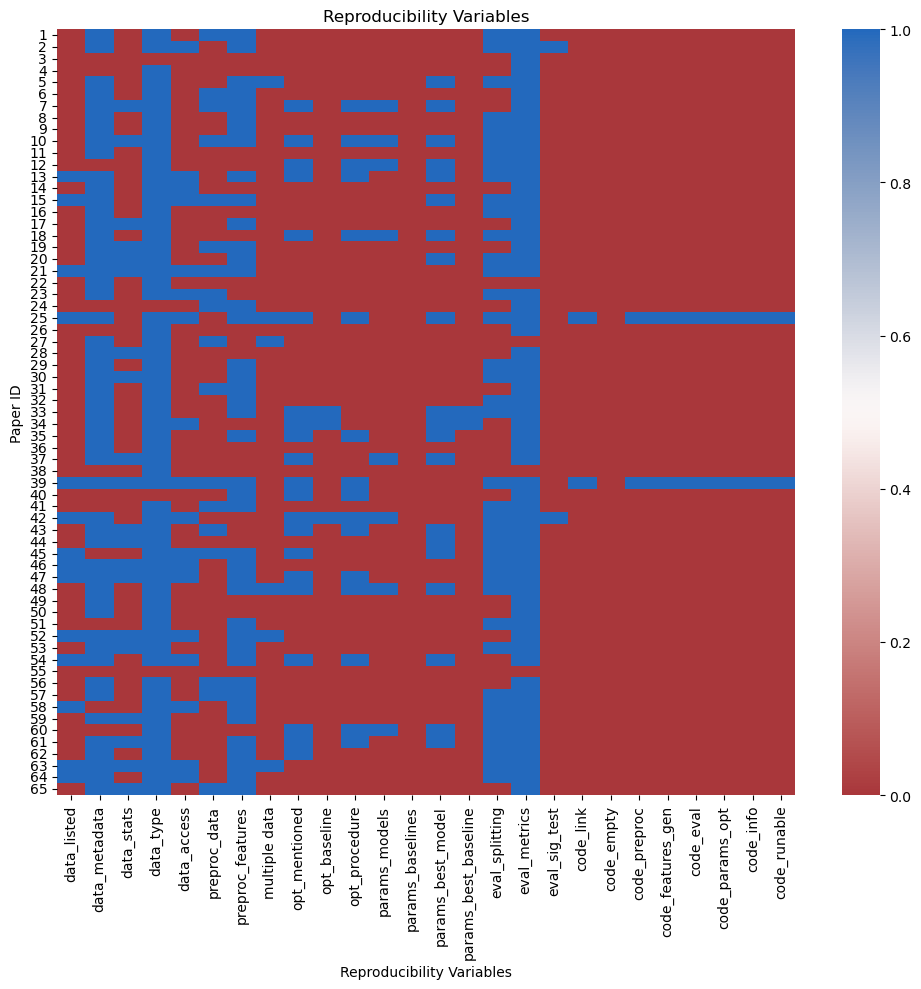

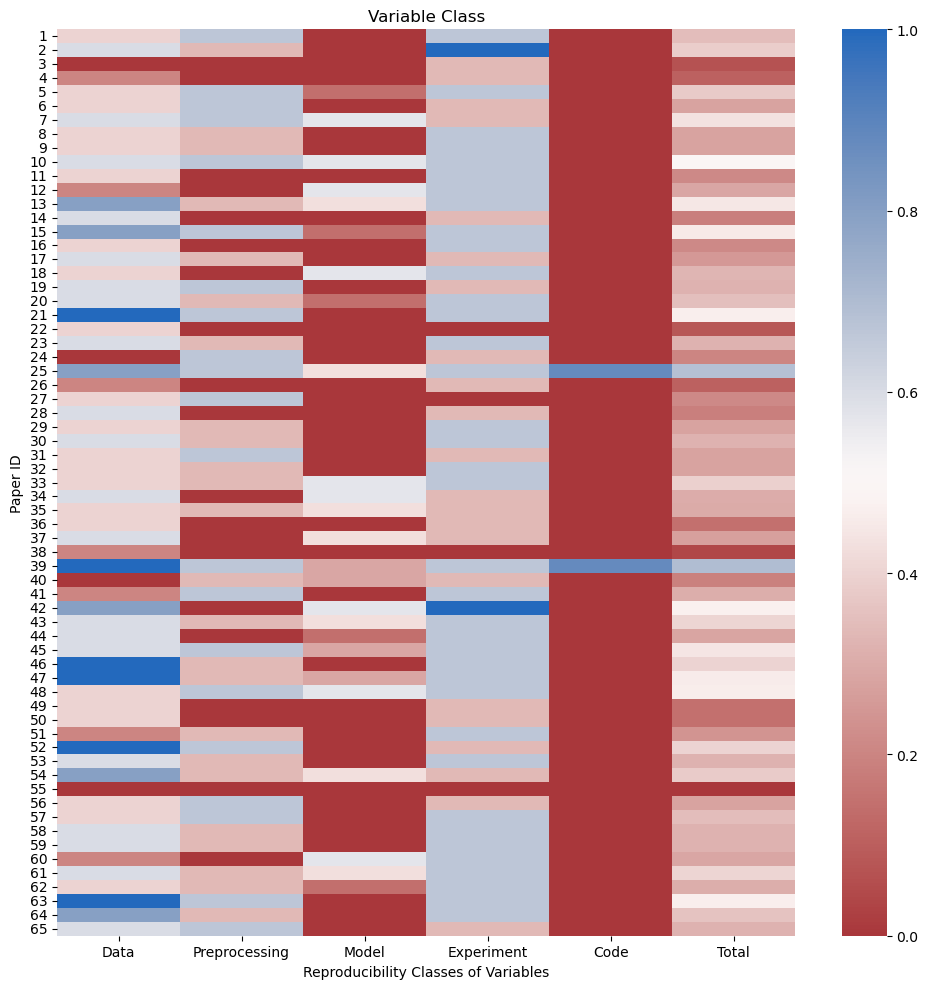

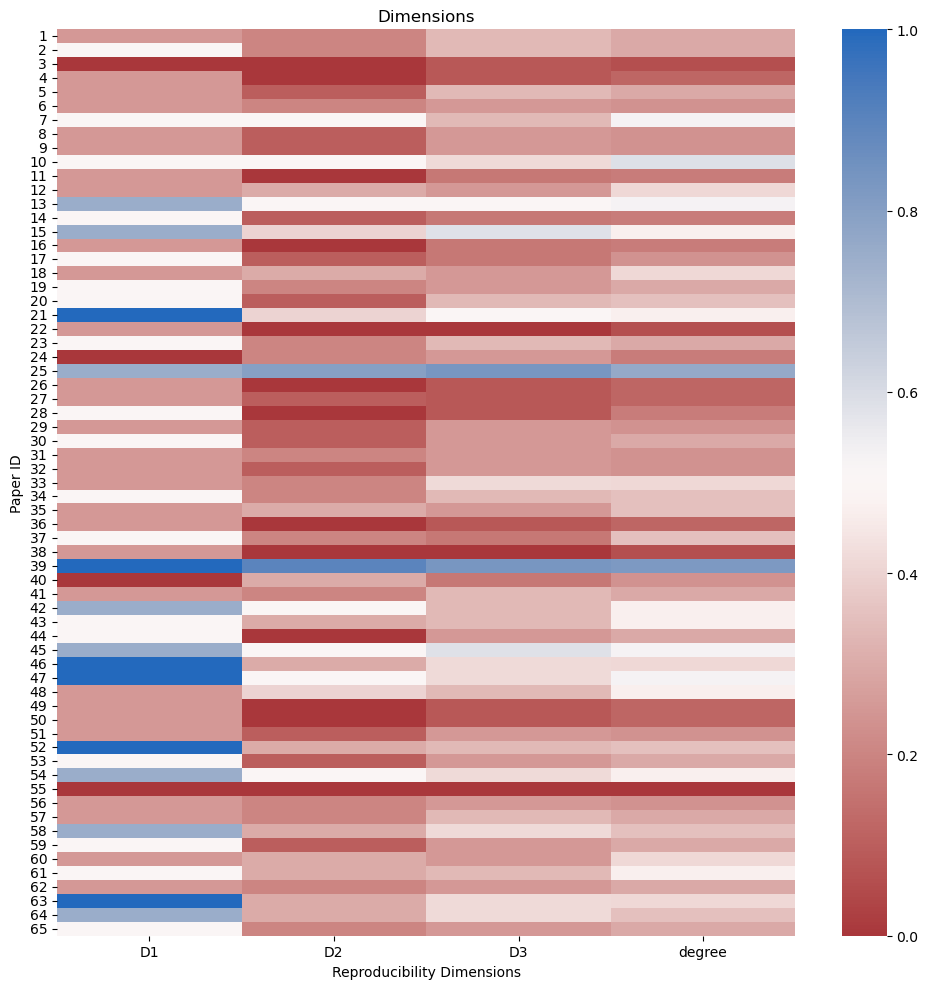

In [10]:
gen_heatmap(data_numeric.drop(columns=["DOI", "DOI_short", "Methodology", "Publisher", "Year"]), title='Reproducibility Variables', xlabel='Reproducibility Variables')
gen_heatmap(scores_class, title='Reproducibility Classes of Variables', xlabel='Variable Class')
gen_heatmap(scores_dimension, title='Reproducibility Dimensions', xlabel='Dimensions')

## 2. Author Analysis: Subjects

For the analysis to the authors the Scopus API was used (for details see `2_scopus_api_call.ipynb`)

In [11]:
with open(f'{data_path}bibliometric_data.json') as f:
    scopus_data = json.load(f)


### Extract Subjects
Create a statistic about the subjects present as well as seperate variables for the two most prominent subjects (Engineering & Computer Science).

In [12]:
subjects = {}
papers_subjects = {}
authors_num = 0
engineering = {}
cs = {}
cs_papers = {}
non_cs_papers = {}
author_list = []
for paper in scopus_data:
    authors = paper.get('authors', [])
    paper_level_subjects = {}
    for author in authors: 
        subject_area = author.get('subject-area')

        for subject in subject_area:
            if subject not in paper_level_subjects:
                paper_level_subjects[subject] = 1

        if author['author-url'] in author_list:
            # print(f'Author {author['author-url']} skipped')
            continue

        authors_num += 1
        author_list.append(author['author-url'])
    
        for subject in subject_area:
            if subject not in subjects:
                subjects[subject] = 0
            subjects[subject] += 1
            if subject == 'Engineering (all)':
                engineering[author['author-url']] = int(author.get('cited-by-count'))
            if subject == 'Computer Science (all)':
                cs[author['author-url']] = int(author.get('cited-by-count'))

    for subject in paper_level_subjects:
        if subject not in papers_subjects:
            papers_subjects[subject] = 0
        papers_subjects[subject] += 1
    if 'Computer Science (all)' in paper_level_subjects:
        cs_papers[paper['doi']] = paper['citation-count']
    else:
        non_cs_papers[paper['doi']] = paper['citation-count']
   
papers_subjects = dict(sorted(papers_subjects.items(), key=lambda item: item[1], reverse=True))
subjects = dict(sorted(subjects.items(), key=lambda item: item[1], reverse=True))

engineering = dict(sorted(engineering.items(), key=lambda item: item[1], reverse=True))
cs = dict(sorted(cs.items(), key=lambda item: item[1], reverse=True))

print('Num of unique authors:', authors_num)
print('Num of subjects:', len(subjects))

subjects

Num of unique authors: 241
Num of subjects: 15


{'Engineering (all)': 173,
 'Computer Science (all)': 143,
 'Energy (all)': 46,
 'Mathematics (all)': 36,
 'Environmental Science (all)': 17,
 'Physics and Astronomy (all)': 12,
 'Decision Sciences (all)': 10,
 'Chemical Engineering (all)': 7,
 'Earth and Planetary Sciences (all)': 6,
 'Materials Science (all)': 3,
 'Multidisciplinary': 3,
 'Medicine (all)': 3,
 'Social Sciences (all)': 2,
 'Biochemistry, Genetics and Molecular Biology (all)': 1,
 'Business, Management and Accounting (all)': 1}

### Subject Analysis
The distribution of the subject assigned to each author by scopus was investigated. 
Only the unique authors where used. 

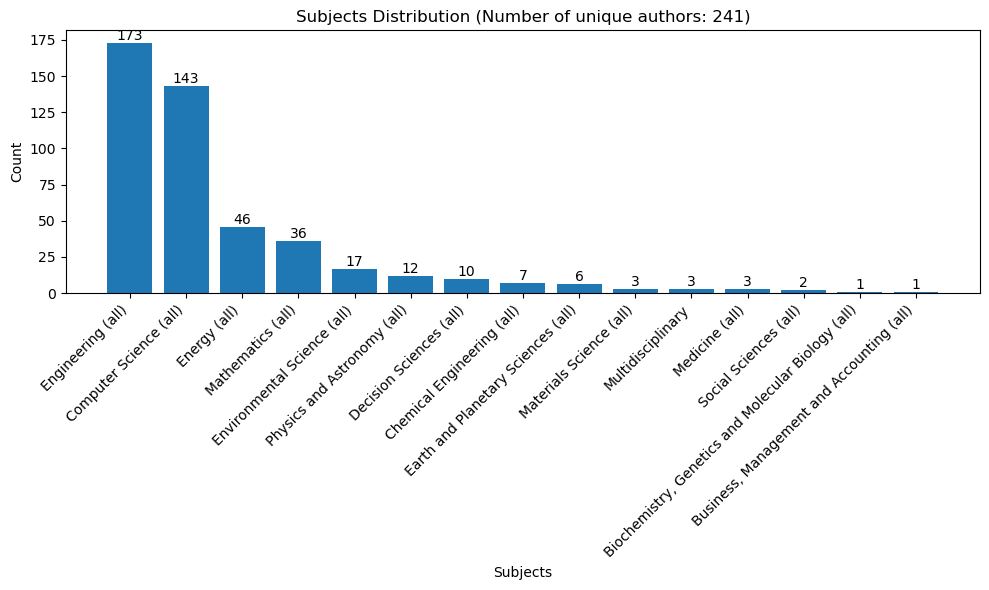

In [13]:
# Create a bar chart for subjects
plt.figure(figsize=(10, 6))
bars = plt.bar(subjects.keys(), subjects.values())
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(bar.get_height()), ha='center', va='bottom')
plt.xticks(rotation=45, ha='right')
plt.title(f'Subjects Distribution (Number of unique authors: {authors_num})')
plt.xlabel('Subjects')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

Distribution of subjects that are included in at least of of the authors subject list. 

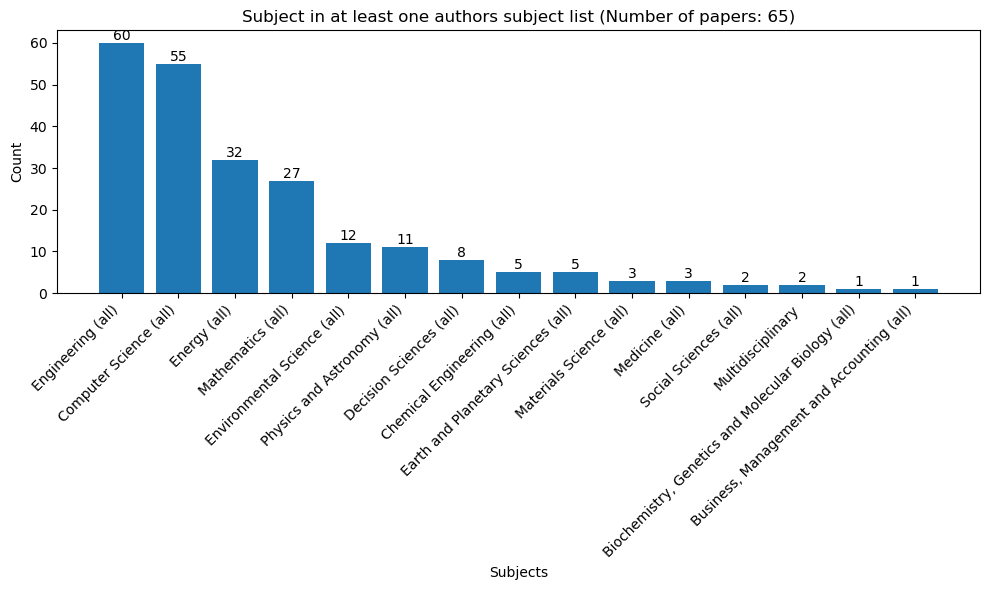

In [14]:
plt.figure(figsize=(10, 6))
bars = plt.bar(papers_subjects.keys(), papers_subjects.values())
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(bar.get_height()), ha='center', va='bottom')
plt.xticks(rotation=45, ha='right')
plt.title(f'Subject in at least one authors subject list (Number of papers: {len(scopus_data)})')
plt.xlabel('Subjects')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

### Citation Analysis

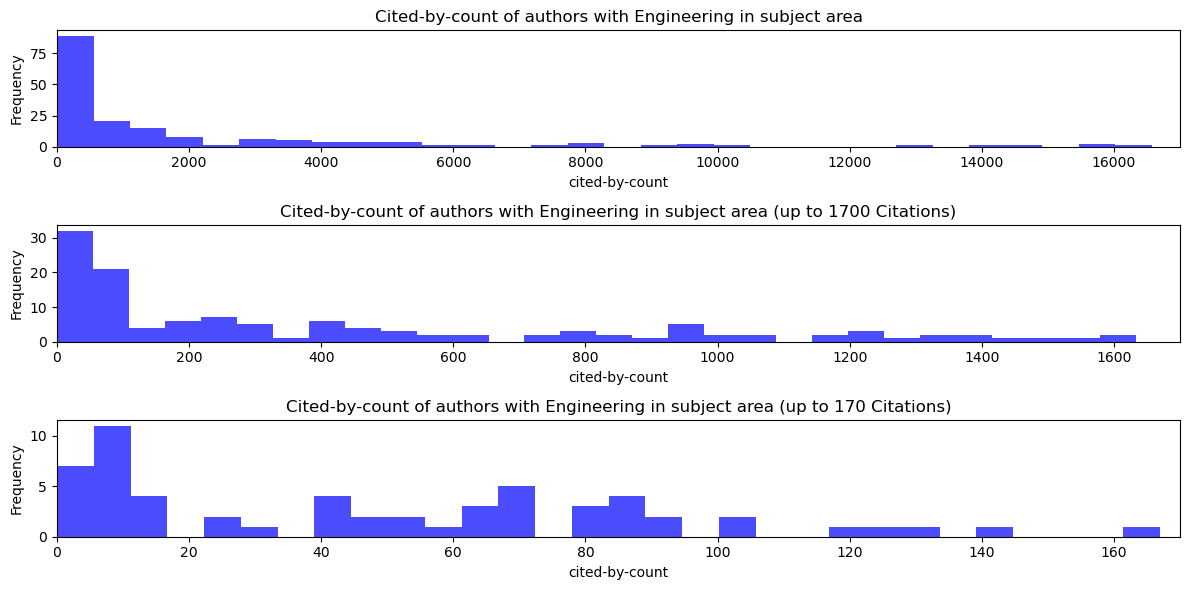

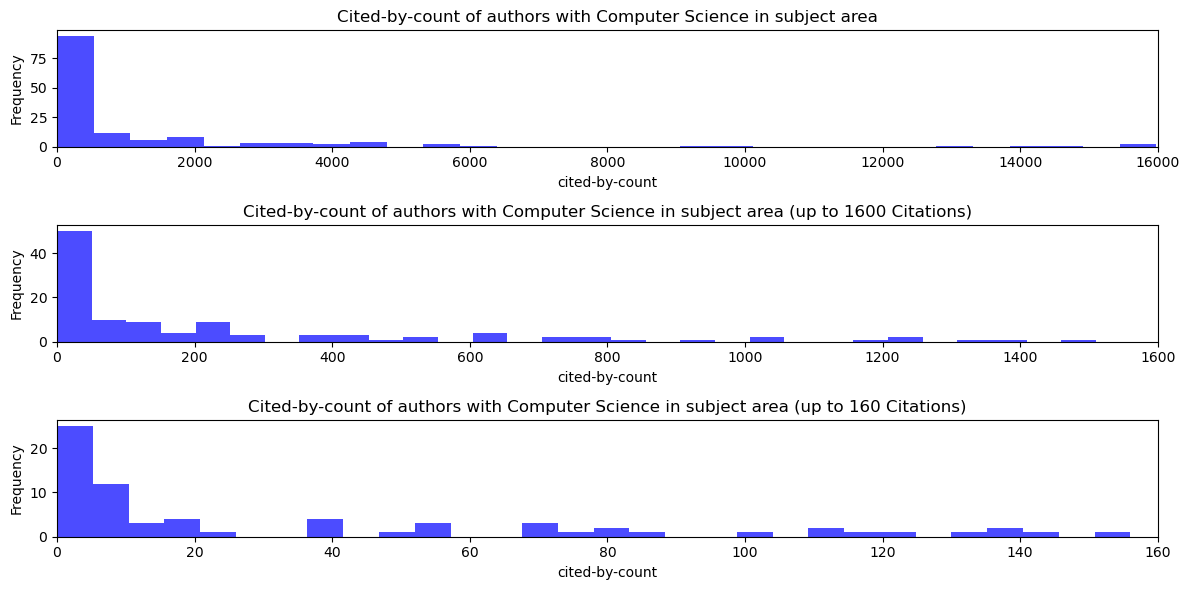

In [15]:
gen_histogram(engineering, 'Engineering', 'subject')
gen_histogram(cs, 'Computer Science', 'subject')

<Axes: title={'center': 'Boxplots of cited-by-count of authors'}, ylabel='Cited-by-Count'>

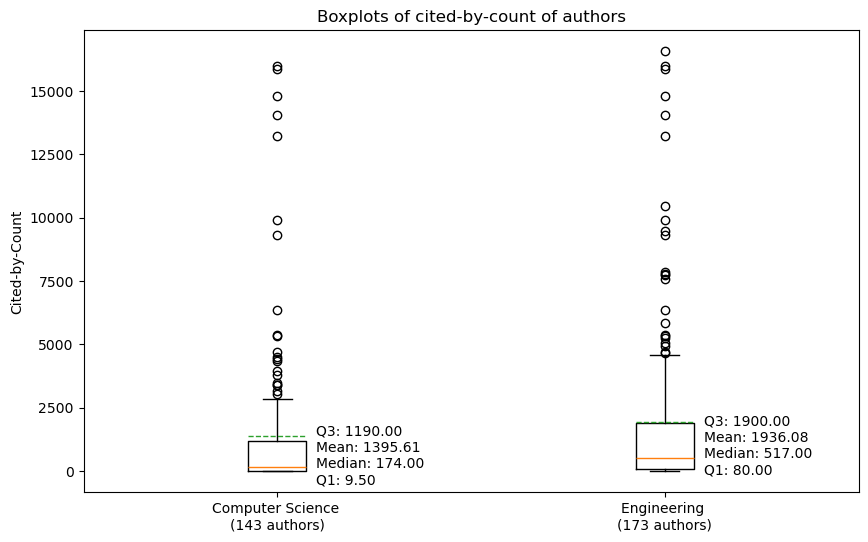

In [16]:
# Generate boxplots for cs and engineering cited-by-count
data_categoric = [
    [int(citation) for citation in cs.values()],
    [int(citation) for citation in engineering.values()]
]

gen_boxplot(data=data_categoric,
            tick_labels=[f'Computer Science \n({len(cs)} authors)', f'Engineering \n({len(engineering)} authors)'],
            title='Boxplots of cited-by-count of authors',
            ylabel='Cited-by-Count')

Anlaysis of citation count for papers with at least on author with subject "Computer Science" and papers with no author with "Computer Science" as subject.

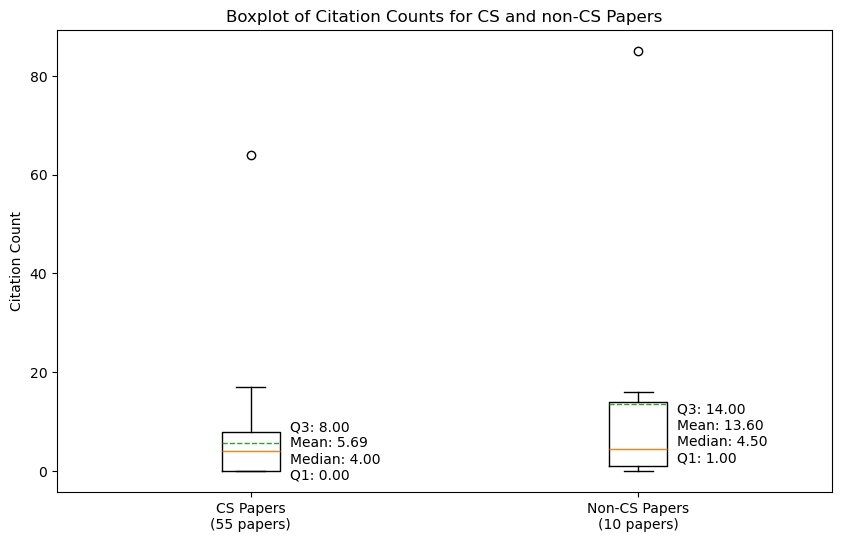

In [17]:
# Prepare data for boxplot
cs_paper_citations = [int(citation) for citation in cs_papers.values()]
non_cs_paper_citations = [int(citation) for citation in non_cs_papers.values()]

fig = gen_boxplot(data=[cs_paper_citations, non_cs_paper_citations],
            tick_labels=[f'CS Papers\n({len(cs_paper_citations)} papers)', f'Non-CS Papers\n({len(non_cs_paper_citations)} papers)'],
            title='Boxplot of Citation Counts for CS and non-CS Papers',
            ylabel='Citation Count')

### Reproducability Analysis

In [18]:
def find_paper_id(doi, doi_to_paper_id):
    result = doi_to_paper_id[doi_to_paper_id['DOI'].str.contains(doi, na=False)]
    if result.empty:
        print(f"Warning: DOI '{doi}' not found in the mapping.")
        return []
    else:
        try:
            return result["Paper ID"].values
        except KeyError:
            return result.index.values

def find_doi(paper_id, doi_to_paper_id, col="DOI"):
    result = doi_to_paper_id[doi_to_paper_id['Paper ID'] == paper_id][col]
    if not result.empty:
        return result.values[0]
    return None

def add_column(df, variable, column_name, doi_to_paper_id):
    for paper in variable:
        paper_id = find_paper_id(paper, doi_to_paper_id)
        if len(paper_id) > 0:
            df.loc[df.index == paper_id[0], column_name] = 1
    return df

In [19]:
cs_degree = pd.DataFrame()
non_cs_degree = pd.DataFrame()

# Filter data for CS and Non-CS papers
for paper in cs_papers.keys():
    if paper in data_numeric['DOI_short'].values or paper in data_numeric['DOI'].values:
        for col in ['D1', 'D2', 'D3', 'degree']:
            cs_degree.loc[paper, col] = scores_dimension.loc[find_paper_id(paper, data_numeric), col].values[0]
    else:
        print(f"Warning: DOI '{paper}' not found in the mapping.")

for paper in non_cs_papers.keys():
    if paper in data_numeric['DOI_short'].values:
        for col in ['D1', 'D2', 'D3', 'degree']:
            non_cs_degree.loc[paper, col] = scores_dimension.loc[find_paper_id(paper, data_numeric), col].values[0]
    else:
        print(f"Warning: DOI '{paper}' not found in the mapping.")


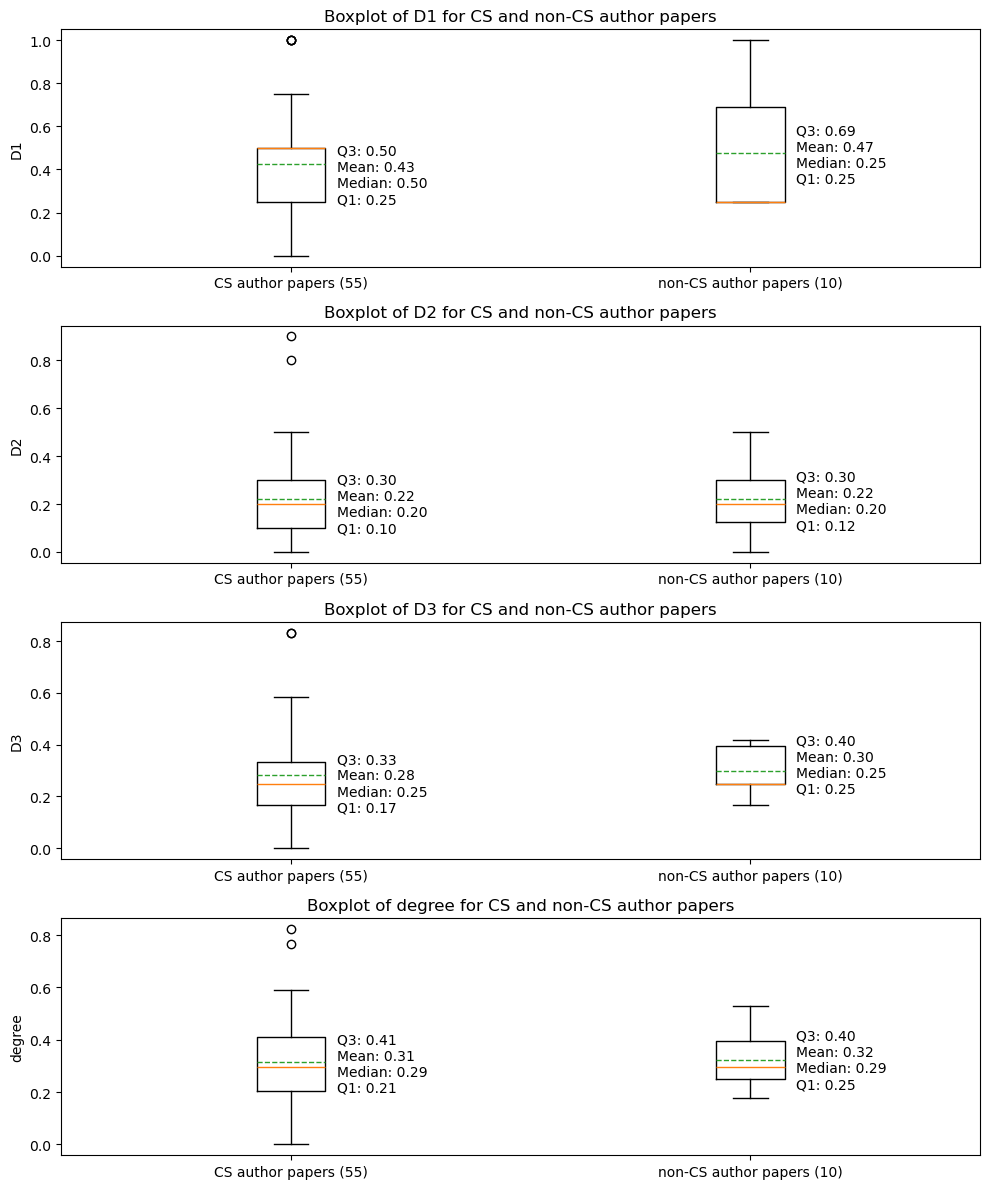

In [20]:
fig, axs = plt.subplots(4, 1, figsize=(10, 12))
for ax, col in zip(axs, ['D1', 'D2', 'D3', 'degree']):
    gen_boxplot(data=[cs_degree[col], non_cs_degree[col]],
                tick_labels=[f'CS author papers ({len(cs_degree)})', f'non-CS author papers ({len(non_cs_degree)})'],
                title=f'Boxplot of {col} for CS and non-CS author papers',
                ylabel=col,
                show_stats=True,
                ax=ax)
fig.tight_layout()

## 3. Author Analysis: Affiliation

Analysis based on the author affilition type ("University", "Industry", "non-academic research") as described in `2_scopus_api_call.ipynb`. 

### Extract the affiliations

In [21]:
affil_types = {}
papers_affil_types = {}
authors_num = 0
authors_unique = 0
university = {}
industry = {}
research = {}

one_university_papers = []
one_industry_papers = []
one_research_papers = []

all_university_papers = []
all_industry_papers = []
all_research_papers = []

author_list = []
papers_all_same_affil_type = {'University': 0, 'Industry': 0, 'non-academic research': 0}

for paper in scopus_data:
    authors = paper.get('authors', [])
    paper_level_affil_types = {}
    for author in authors: 
        if author['author-url'] not in author_list:
            # print(f'Author {author['author-url']} skipped')
            # continue
            authors_unique += 1
            author_list.append(author['author-url'])

        authors_num += 1
        
    
        affil_type_list = author.get('affil-type', {})
        if type(affil_type_list) is not list:
            affil_type_list = [affil_type_list]
        
        for affil_type in affil_type_list:
            if affil_type not in paper_level_affil_types:
                paper_level_affil_types[affil_type] = 1
            
            if affil_type not in affil_types:
                affil_types[affil_type] = 0
            affil_types[affil_type] += 1
            if affil_type == 'University':
                university[author['author-url']] = int(author.get('cited-by-count'))
            if affil_type == 'Industry':
                industry[author['author-url']] = int(author.get('cited-by-count'))
            if affil_type == 'non-academic research':
                research[author['author-url']] = int(author.get('cited-by-count'))

    for affil_type in paper_level_affil_types:
        if affil_type not in papers_affil_types:
            papers_affil_types[affil_type] = 0
        papers_affil_types[affil_type] += 1

        if affil_type == 'University':
            if paper['doi'] not in one_university_papers:
                one_university_papers.append(paper['doi'])
        if affil_type == 'Industry':
            if paper['doi'] not in one_industry_papers:
                one_industry_papers.append(paper['doi'])
        if affil_type == 'non-academic research':
            if paper['doi'] not in one_research_papers:
                one_research_papers.append(paper['doi'])


    if len(set(paper_level_affil_types.keys())) == 1:
        affil = list(paper_level_affil_types.keys())[0]
        papers_all_same_affil_type[affil] += 1
        if affil == 'University':
            all_university_papers.append(paper['doi'])
        if affil == 'Industry':
            all_industry_papers.append(paper['doi'])
        if affil == 'non-academic research':
            all_research_papers.append(paper['doi'])
   
papers_affil_types = dict(sorted(papers_affil_types.items(), key=lambda item: item[1], reverse=True))
affil_types = dict(sorted(affil_types.items(), key=lambda item: item[1], reverse=True))

university = dict(sorted(university.items(), key=lambda item: item[1], reverse=True))
industry = dict(sorted(industry.items(), key=lambda item: item[1], reverse=True))
research = dict(sorted(research.items(), key=lambda item: item[1], reverse=True))

print('Num of unique authors:', authors_unique)
print('Num of authors in all papers:', authors_num, '(some authors have worked on multiple papers)')
print('Sum of affiliation types:', sum(affil_types.values()), '(some authors have multiple affiliations)')

affil_types

Num of unique authors: 241
Num of authors in all papers: 267 (some authors have worked on multiple papers)
Sum of affiliation types: 272 (some authors have multiple affiliations)


{'University': 210, 'Industry': 36, 'non-academic research': 26}

### Affiliation Analysis

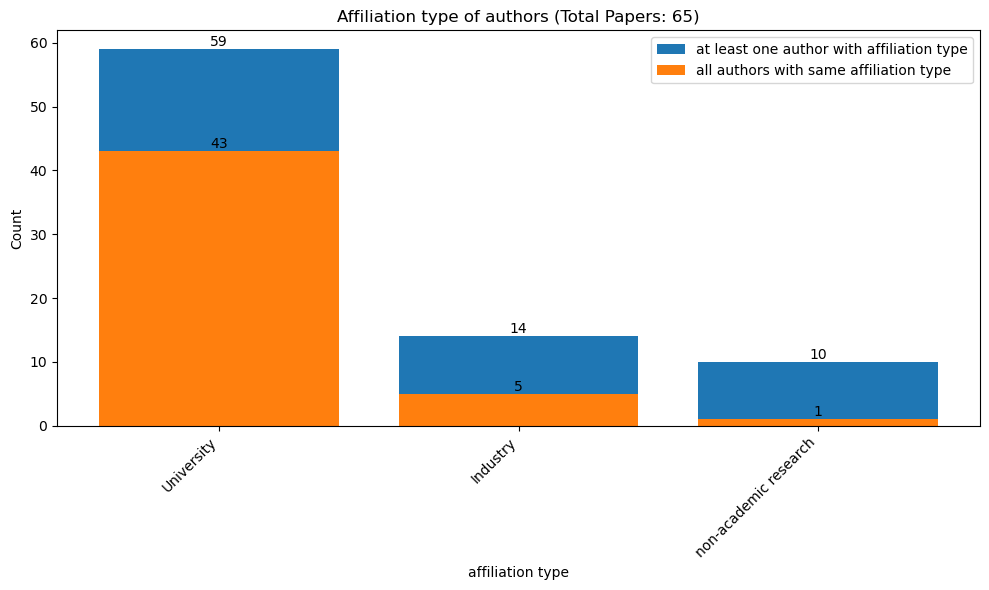

In [22]:
plt.figure(figsize=(10, 6))
bars = plt.bar(papers_affil_types.keys(), papers_affil_types.values(), label='at least one author with affiliation type')
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(bar.get_height()), ha='center', va='bottom')
bars_all = plt.bar(papers_all_same_affil_type.keys(), papers_all_same_affil_type.values(), label='all authors with same affiliation type')
for bar in bars_all:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(bar.get_height()), ha='center', va='bottom')
plt.xticks(rotation=45, ha='right')
plt.title(f'Affiliation type of authors (Total Papers: {len(scopus_data)})')
plt.xlabel('affiliation type')
plt.ylabel('Count')
plt.legend()
plt.tight_layout()
plt.show()

### Citation Analysis

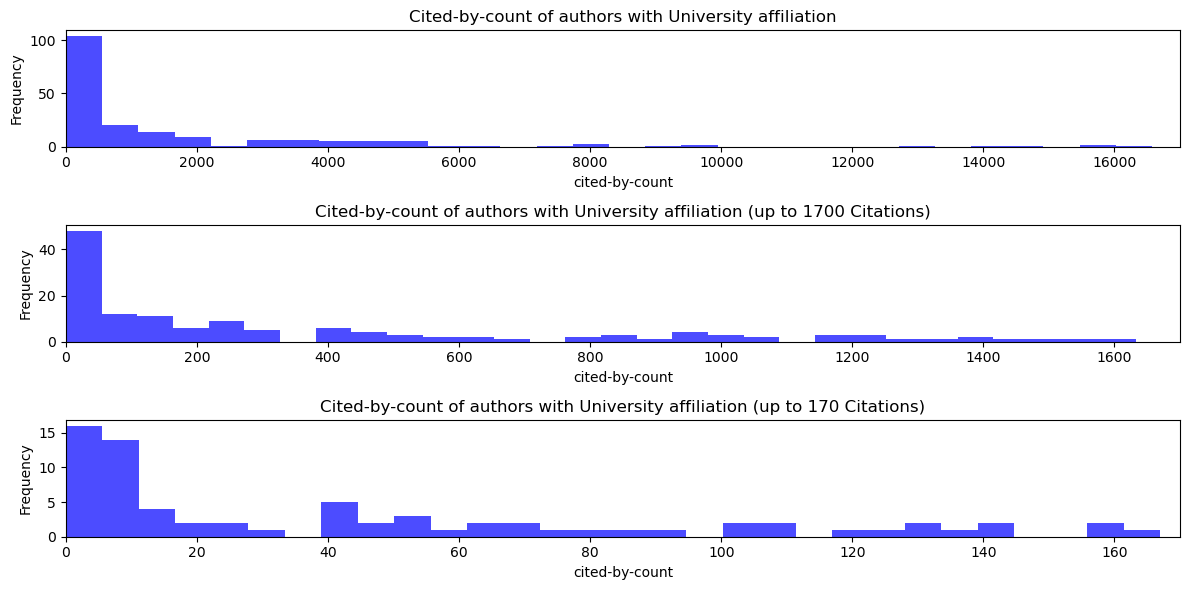

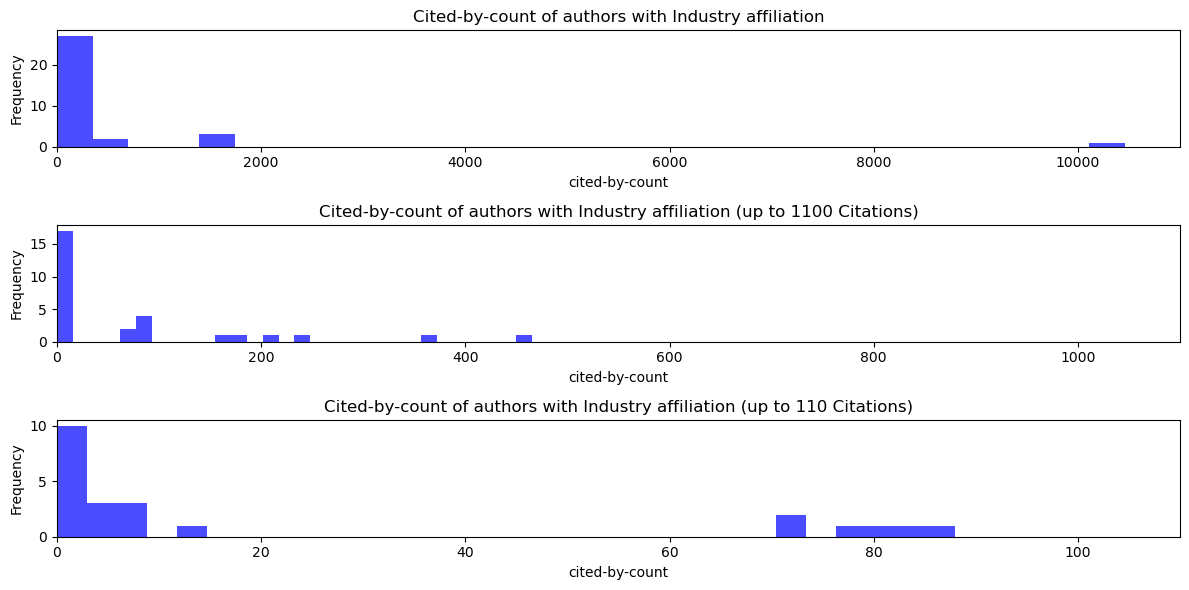

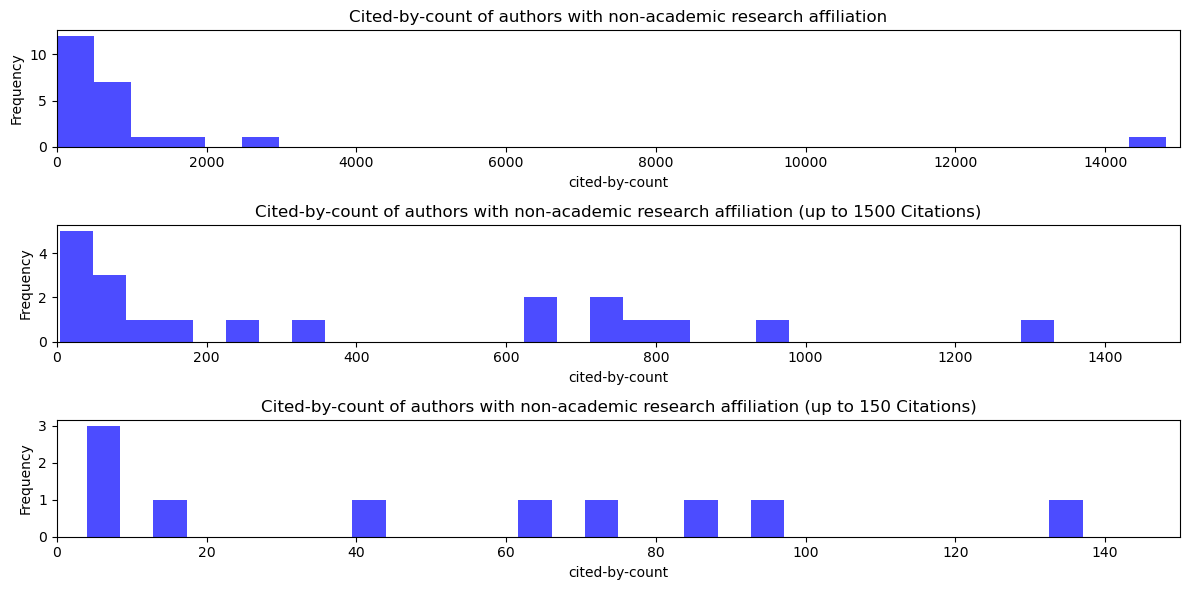

In [23]:
gen_histogram(university, 'University', stat_type='affil')
gen_histogram(industry, 'Industry', stat_type='affil')
gen_histogram(research, 'non-academic research', stat_type='affil')

<Axes: title={'center': 'Boxplots of cited-by-count of authors'}, ylabel='Cited-by-Count'>

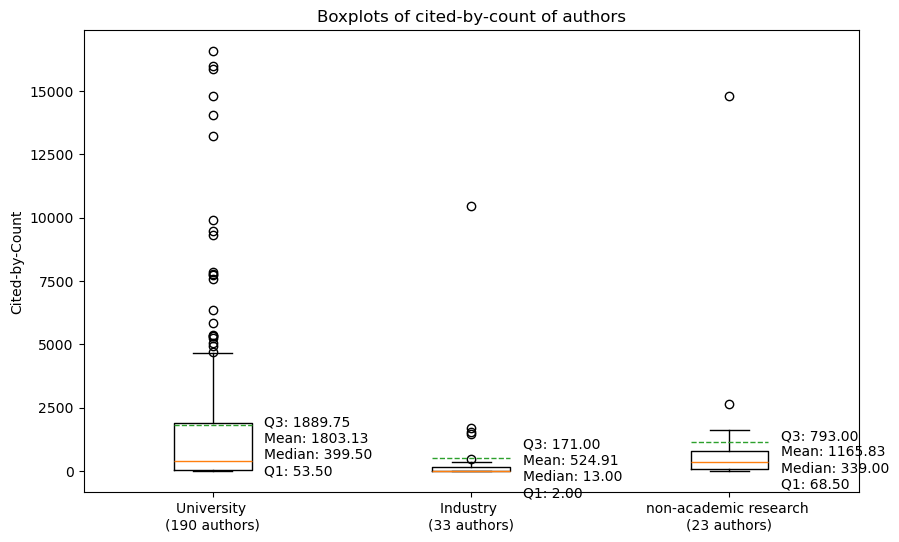

In [24]:
data_categoric = [
    [int(citation) for citation in university.values()],
    [int(citation) for citation in industry.values()],
    [int(citation) for citation in research.values()]
]

gen_boxplot(data=data_categoric,
            tick_labels=[f'University \n({len(university.values())} authors)', 
                         f'Industry \n({len(industry.values())} authors)', 
                         f'non-academic research \n({len(research.values())} authors)'],
            title='Boxplots of cited-by-count of authors',
            ylabel='Cited-by-Count')


### Reproducability Analysis

Investigate the correlation between the affiliation type and the reproducability score.

In [25]:
variables = [one_university_papers, one_industry_papers, one_research_papers, all_university_papers, all_industry_papers, all_research_papers]
variables_names = ['one_university', 'one_industry', 'one_research', 'all_university', 'all_industry', 'all_research']

for variable, variable_name in zip(variables, variables_names):
    scores_dimension = add_column(scores_dimension, variable, variable_name, data_numeric)


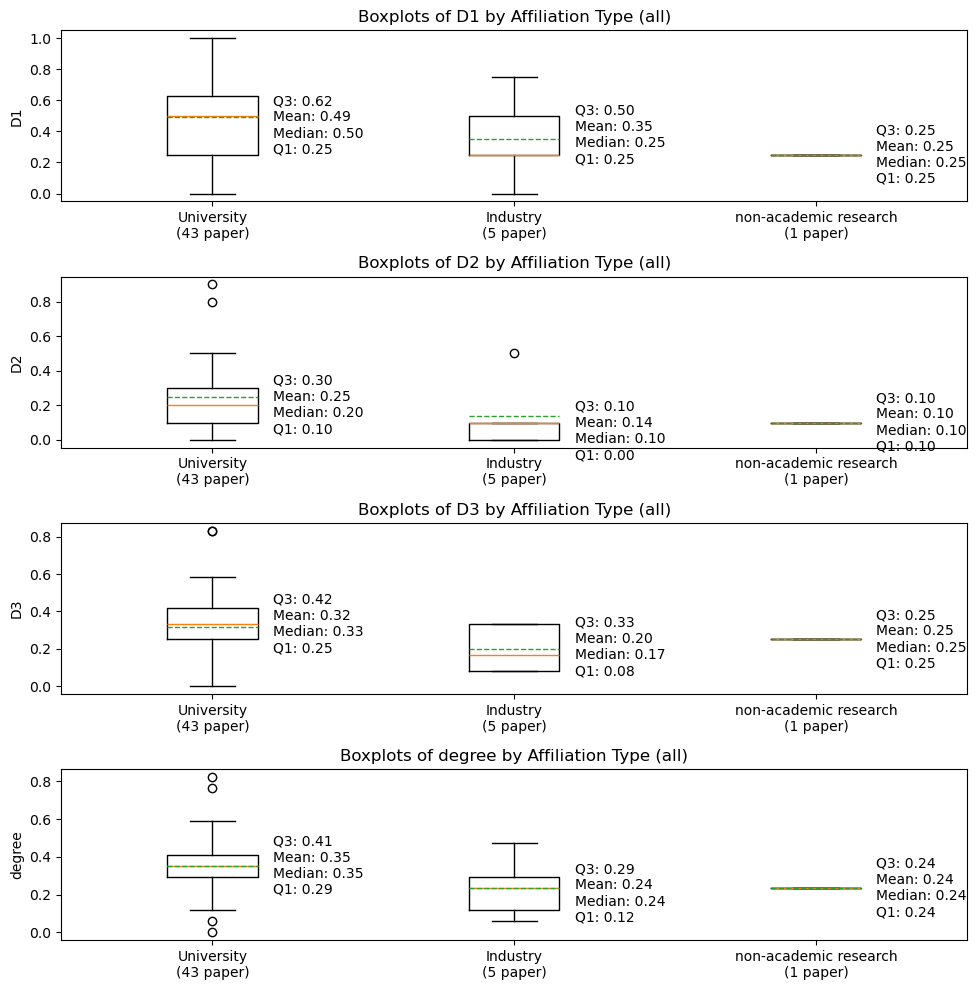

In [26]:
# Filter data for each affiliation type
all_university = scores_dimension[scores_dimension['all_university'] == 1]
all_industry = scores_dimension[scores_dimension['all_industry'] == 1]
all_research = scores_dimension[scores_dimension['all_research'] == 1]

# Create boxplot
fig, axs = plt.subplots(4, 1, figsize=(10, 10))
data_categoric = [all_university, all_industry, all_research]
for ax, variable in zip(axs, ['D1', 'D2', 'D3', 'degree']):
    data_categoric = [all_university[variable], all_industry[variable], all_research[variable]]
    gen_boxplot(
        data=data_categoric,
        tick_labels=[f'University\n({len(all_university)} paper)', f'Industry\n({len(all_industry)} paper)', f'non-academic research\n({len(all_research)} paper)'],
        title=f'Boxplots of {variable} by Affiliation Type (all)',
        ylabel=f'{variable}',
        show_stats=True,
        ax=ax
    )
fig.tight_layout()


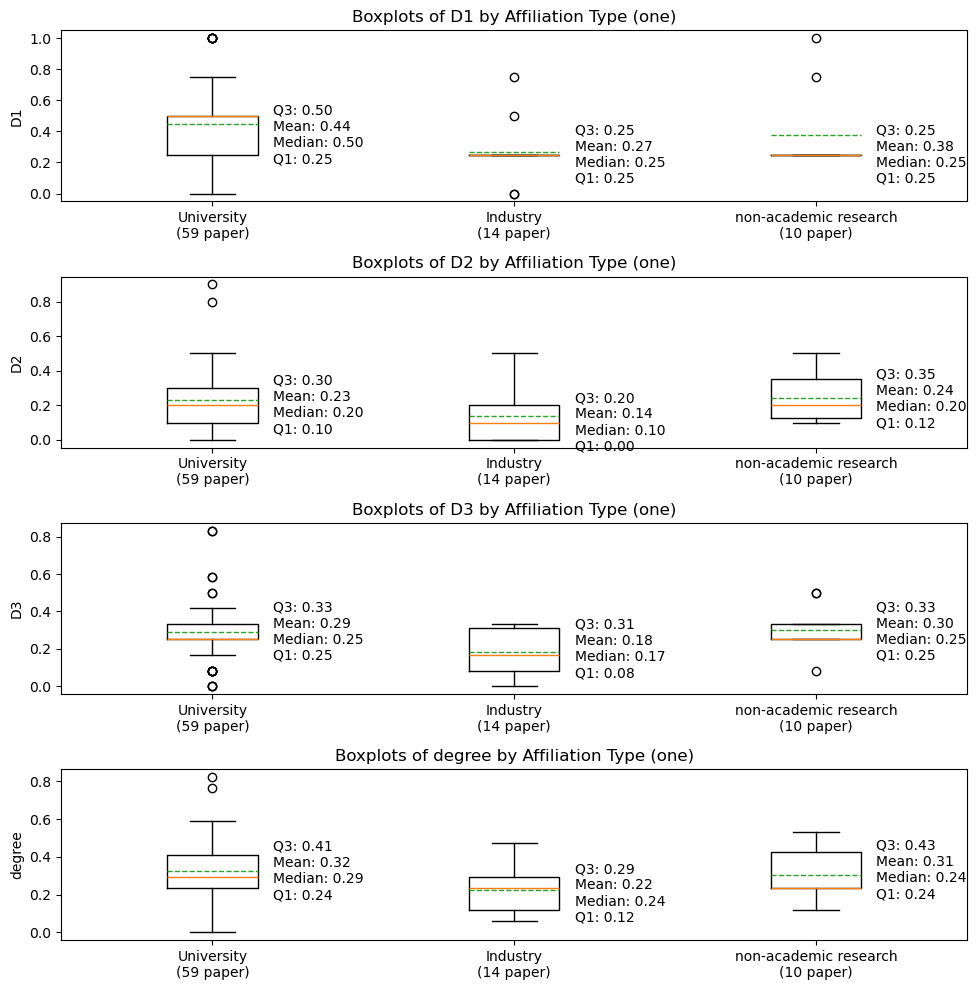

In [27]:
# Filter data for each affiliation type
one_university = scores_dimension[scores_dimension['one_university'] == 1]
one_industry = scores_dimension[scores_dimension['one_industry'] == 1]
one_research = scores_dimension[scores_dimension['one_research'] == 1]

# Create boxplot
fig, axs = plt.subplots(4, 1, figsize=(10, 10))
for ax, variable in zip(axs, ['D1', 'D2', 'D3', 'degree']):
    data_categoric = [one_university[variable], one_industry[variable], one_research[variable]]
    gen_boxplot(
        data=data_categoric,
        tick_labels=[f'University\n({len(one_university)} paper)', f'Industry\n({len(one_industry)} paper)', f'non-academic research\n({len(one_research)} paper)'],
        title=f'Boxplots of {variable} by Affiliation Type (one)',
        ylabel=f'{variable}',
        show_stats=True,
        ax=ax
    )
fig.tight_layout()

## 4. Citations vs. Reproducability

In [28]:
def add_lin_fit(x, y, ax):
    X = sm.add_constant(x)

    model = sm.OLS(y, X)
    results = model.fit()

    params = results.params
    errors = results.bse 
    
    x_ = np.linspace(0, 1, 100)
    y_fit = params.iloc[0] + params.iloc[1] * x_
    y_fit_upper = params.iloc[0] + 1.98 * errors.iloc[0] + (params.iloc[1] + 1.98 * errors.iloc[1]) * x_
    y_fit_lower = params.iloc[0] - 1.98 * errors.iloc[0] + (params.iloc[1] - 1.98 * errors.iloc[1]) * x_
    ax.plot(x_, y_fit, color='red', linewidth=1, linestyle='--', label=f'y = {params.iloc[0]:.1f}$\\pm${errors.iloc[0]:.1f}+({params.iloc[1]:.1f}$\\pm${errors.iloc[1]:.1f})x')
    ax.fill_between(x_, y_fit_lower, y_fit_upper, color='red', alpha=0.1, label='95% CI')
    ax.legend()

    print(f"Slope ({x.name}): {params.iloc[1]:.4f} ± {errors.iloc[1]:.4f}; p-value: {results.pvalues.iloc[1]:.6f}")
    print(f"Intercept: {params.iloc[0]:.4f} ± {errors.iloc[0]:.4f}; p-value: {results.pvalues.iloc[0]:.6f}")
    print(f"R-squared: {results.rsquared:.4f}")
    print("-" * 40)
    return ax

In [29]:
for paper in scopus_data:
    paper_id = find_paper_id(paper['doi'], data_numeric)
    if len(paper_id) > 0:
        scores_dimension.loc[paper_id[0], 'citation-count'] = int(paper.get('citation-count'))
    else:
        print(f"Warning: DOI '{paper['doi']}' not found in the mapping.")
scores_dimension['citation-count'] = scores_dimension['citation-count'].astype(int)

Slope (D1): 7.0806 ± 6.2103; p-value: 0.258547
Intercept: 3.8304 ± 3.1584; p-value: 0.229757
R-squared: 0.0202
----------------------------------------
Slope (D2): -0.1621 ± 8.7265; p-value: 0.985237
Intercept: 6.9434 ± 2.5361; p-value: 0.008030
R-squared: 0.0000
----------------------------------------
Slope (D3): 1.9126 ± 10.1822; p-value: 0.851609
Intercept: 6.3633 ± 3.3381; p-value: 0.061179
R-squared: 0.0006
----------------------------------------
Slope (degree): -0.4591 ± 10.4007; p-value: 0.964935
Intercept: 7.0523 ± 3.6708; p-value: 0.059240
R-squared: 0.0000
----------------------------------------


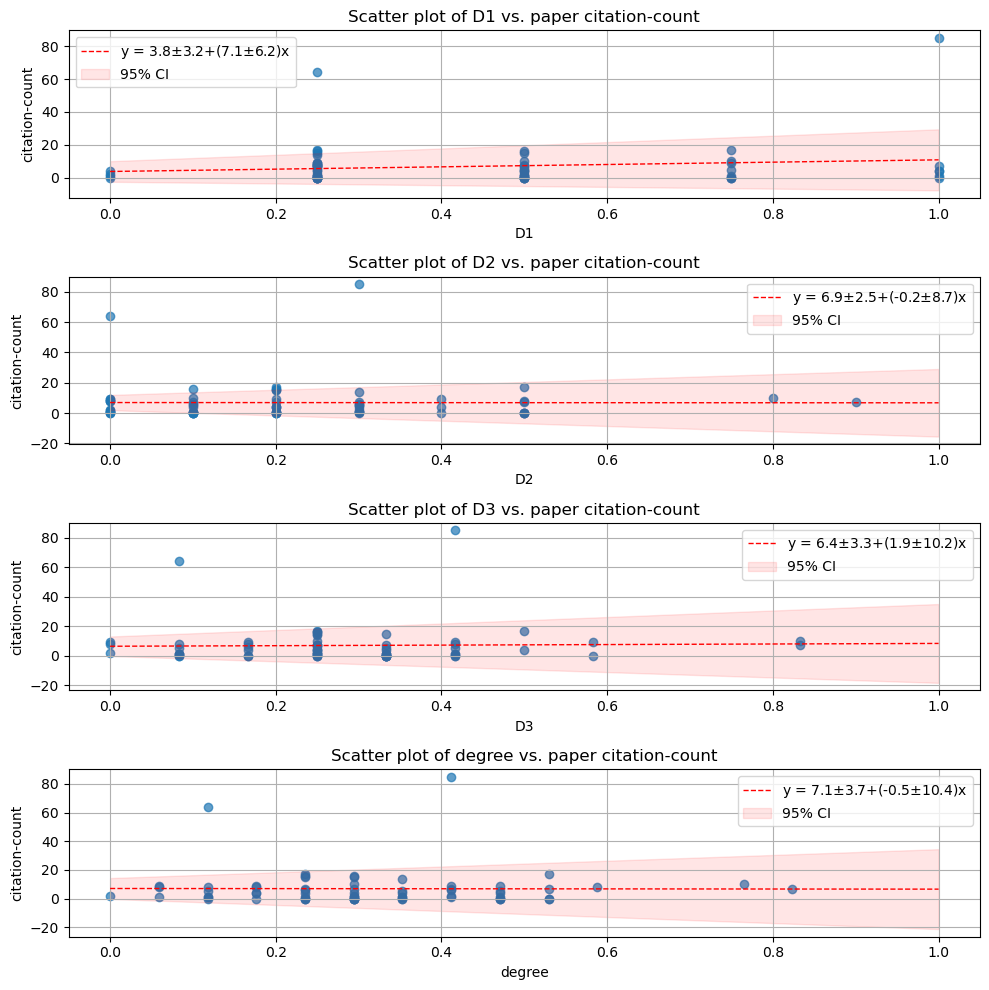

In [30]:
fig, axs = plt.subplots(4, 1, figsize=(10, 10))
for ax, variable in zip(axs, ['D1', 'D2', 'D3', 'degree']):
    ax.scatter(scores_dimension[variable], scores_dimension['citation-count'], alpha=0.7)
    ax.set(
        xlabel=variable, 
        ylabel='citation-count', 
        title=f'Scatter plot of {variable} vs. paper citation-count')
    ax = add_lin_fit(scores_dimension[variable], scores_dimension['citation-count'], ax)
    ax.grid(True)
fig.tight_layout()